# Flight Dataset

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import Callback

In [183]:
df = pd.read_excel('https://firebasestorage.googleapis.com/v0/b/common-e8332.appspot.com/o/flight_dataset.xlsx?alt=media&token=4cd88839-fb3d-4d2c-a259-85e2595cd5d9')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [185]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [186]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [187]:
df.shape

(10682, 11)

In [188]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [189]:
oe_airline = OrdinalEncoder(categories=[df['Airline'].unique()])
df['Airline'] = oe_airline.fit_transform(df[['Airline']])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,1.0,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,2.0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,0.0,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,0.0,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [190]:
stops = df['Total_Stops'].unique()
stops

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [191]:
sorted_stops = np.sort(stops)
sorted_stops

array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
      dtype=object)

In [192]:
sorted_stops = np.concatenate(([sorted_stops[-1]], sorted_stops[:-1]))
sorted_stops

array(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [193]:
oe_stops = OrdinalEncoder(categories=[sorted_stops])
df['Total_Stops'] = oe_stops.fit_transform(df[['Total_Stops']])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,1.0,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662
2,2.0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,0.0,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218
4,0.0,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302


In [194]:
df['Duration'].str.split('h').str[0].isnull().sum()

0

In [195]:
# Removing Unexpected Row
idx = df.loc[ df['Duration'] == '5m' ].index
df.drop(index=idx, inplace=True)

In [196]:
h_split = df['Duration'].str.split('h')
mins1 = h_split.str[0].astype(int)*60
mins2 = h_split.str[1].str.split('m').str[0].replace({'': 0}).astype(int)
df['Duration'] = mins1 + mins2
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0.0,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0.0,No info,3897
1,1.0,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2.0,No info,7662
2,2.0,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2.0,No info,13882
3,0.0,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1.0,No info,6218
4,0.0,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1.0,No info,13302


In [197]:
df.drop(columns=['Additional_Info', 'Arrival_Time', 'Route', 'Source', 'Destination'], inplace=True)

In [198]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.tz_localize('Asia/Kolkata')

# Extract date
df['date'] = df['Date_of_Journey'].dt.day

# Extract month
df['month'] = df['Date_of_Journey'].dt.month

# Extract year
df['year'] = df['Date_of_Journey'].dt.year

# Extract day (day of the week)
df['day'] = df['Date_of_Journey'].dt.dayofweek+1

df.drop(columns='Date_of_Journey', inplace=True)

df.head()

,Airline,Dep_Time,Duration,Total_Stops,Price,date,month,year,day
0,0.0,22:20,170,0.0,3897,24,3,2019,7
1,1.0,05:50,445,2.0,7662,1,5,2019,3
2,2.0,09:25,1140,2.0,13882,9,6,2019,7
3,0.0,18:05,325,1.0,6218,12,5,2019,7
4,0.0,16:50,285,1.0,13302,1,3,2019,5


In [199]:
dep_time_split = df['Dep_Time'].str.split(':')
mins1 = dep_time_split.str[0].astype(int)*60
mins2 = dep_time_split.str[1].astype(int)
df['Dep_Time'] = mins1+mins2
df.head()

,Airline,Dep_Time,Duration,Total_Stops,Price,date,month,year,day
0,0.0,1340,170,0.0,3897,24,3,2019,7
1,1.0,350,445,2.0,7662,1,5,2019,3
2,2.0,565,1140,2.0,13882,9,6,2019,7
3,0.0,1085,325,1.0,6218,12,5,2019,7
4,0.0,1010,285,1.0,13302,1,3,2019,5


<Axes: >

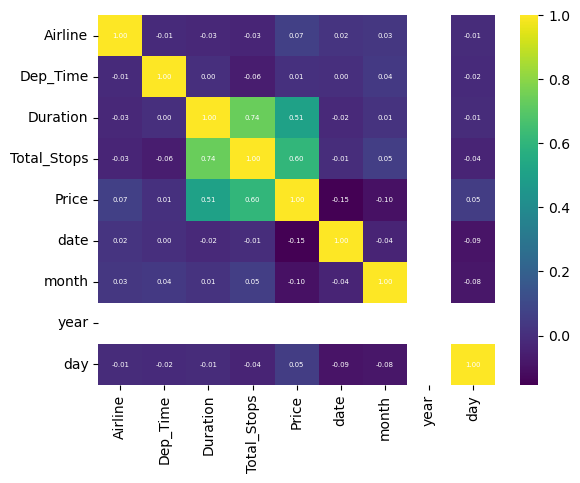

In [200]:
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt=".2f", annot_kws={"size": 5, "color": "white"})

In [201]:
corr_matrix_abs = df.drop(columns='Price').corr().abs()

# Set the threshold for highly correlated features
threshold = 0.7

# List of highly correlated features
high_corr_features = np.where(corr_matrix_abs > threshold)
high_corr_pairs = [(corr_matrix_abs.index[x], corr_matrix_abs.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]
high_corr_pairs

[('Duration', 'Total_Stops')]

In [202]:
df = df.drop(columns=['Duration'])
X_df = df.drop(columns='Price')
y_df = df['Price']

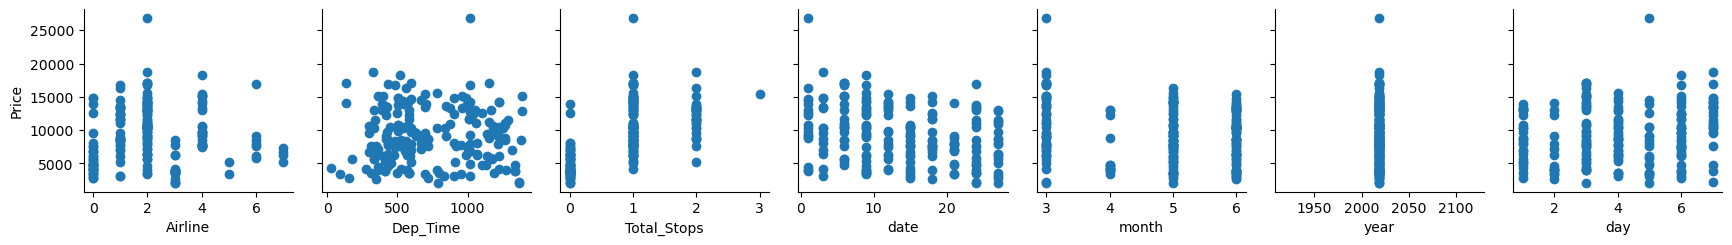

In [203]:
random_df = df.sample(n=200, random_state=10)
# random_df = df.copy()
grid = sns.PairGrid(data=random_df, y_vars=['Price'], x_vars=random_df.columns.drop(labels='Price'))
grid.map(plt.scatter)

In [204]:
def plt_time_dist(y, df, ylabel=None):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    if ylabel == None:
        ylabel = y
    # Create bar plots
    if 'hour' in df:
        sns.barplot(x='hour', y = y, data=df, errorbar=None, ax=axes[0, 0])
        axes[0, 0].set_xlabel('Hour')
        axes[0, 0].set_ylabel(ylabel)
    else:
        axes[0, 0].axis('off')
    if 'date' in df:
        sns.barplot(x='date', y = y, data=df, errorbar=None, ax=axes[0, 1])
        axes[0, 1].set_xlabel('Date')
        axes[0, 1].set_ylabel(ylabel)
    else:
        axes[0, 1].axis('off')
    if 'day' in df:
        sns.barplot(x='day', y = y, data=df, errorbar=None, ax=axes[1, 0])
        axes[1, 0].set_xlabel('Day')
        axes[1, 0].set_ylabel(ylabel)
    else:
        axes[1, 0].axis('off')
    if 'month' in df:
        sns.barplot(x='month', y = y, data=df, errorbar=None, ax=axes[1, 1])
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel(ylabel)
    else:
        axes[1, 1].axis('off')
    if 'year' in df:
        sns.barplot(x='year', y = y, data=df, errorbar=None, ax=axes[2, 0])
        axes[2, 0].set_xlabel('Year')
        axes[2, 0].set_ylabel(ylabel)
    else:
        axes[2, 0].axis('off')

    # Optionally add an empty plot in the last subplot if required
    axes[2, 1].axis('off')

    # Set the overall title for the entire figure
    fig.suptitle(f'{ylabel} by Hour, Date, Day, Month, and Year', fontsize=16)

    # Adjust layout to make room for the title
    plt.tight_layout()  # Adjust rect to leave space for the title
    plt.show()

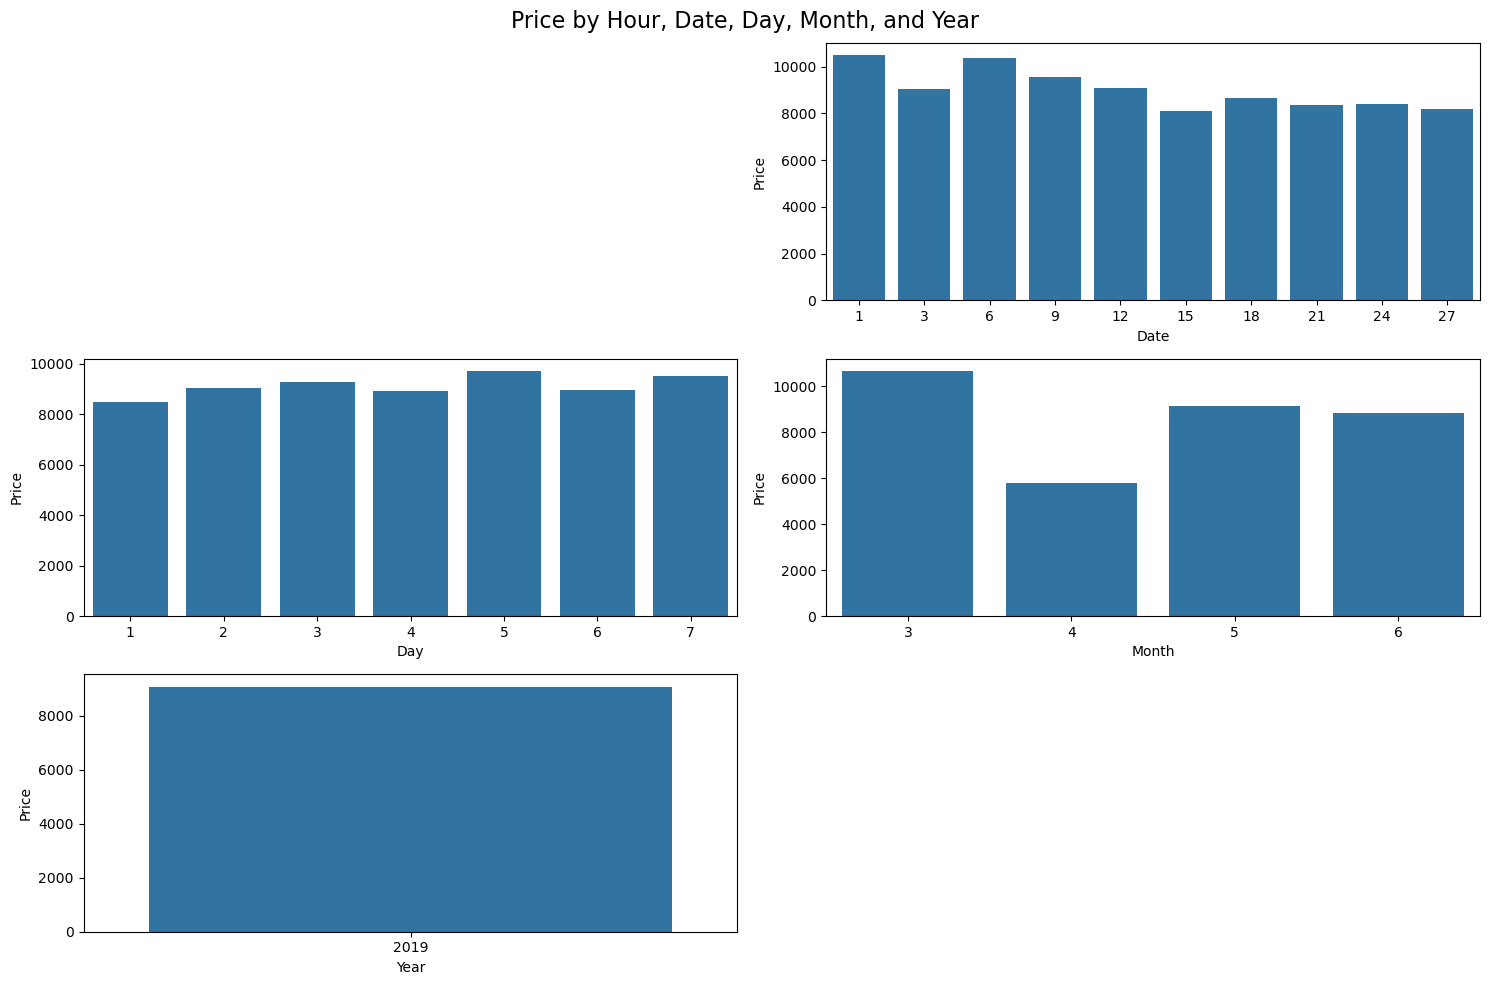

In [205]:
plt_time_dist(y='Price', df=df)

In [206]:
forest = RandomForestRegressor(n_estimators=100, random_state=1)
forest.fit(X_df, y_df)
importances = forest.feature_importances_
indices_desc = np.argsort(importances)[::-1]
importances = importances[indices_desc] / importances.max()
imp_features_desc = X_df.columns[indices_desc]

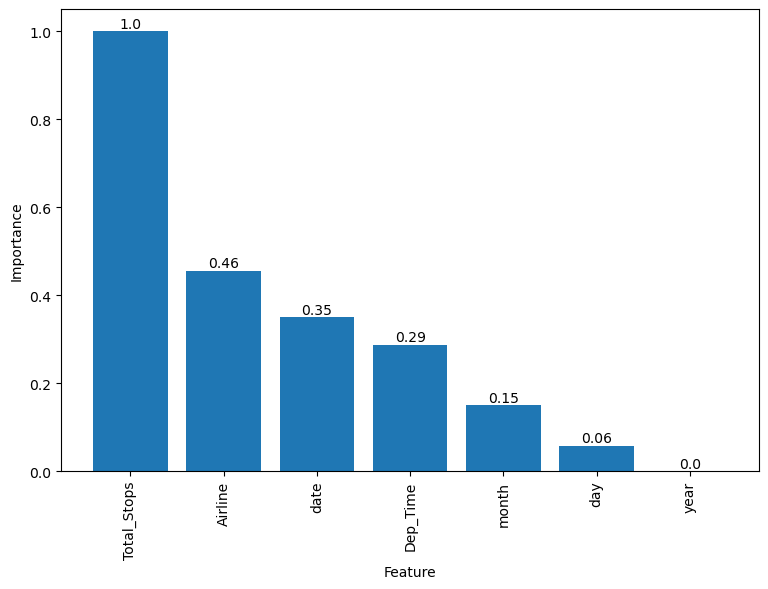

In [207]:
int_idx = np.arange(indices_desc.shape[0])
plt.figure(figsize=(9, 6))
bars = plt.bar(int_idx, importances)
bar_idx = 0
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0005, round(yval, 2), ha='center', va='bottom', fontsize=10)
    bar_idx += 1
plt.xticks(int_idx, imp_features_desc, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [208]:
airline_ohe = pd.get_dummies(X_df['Airline'], drop_first=True).astype(int)
X_df = pd.concat([X_df, airline_ohe], axis=1)
X_df.head()

,Airline,Dep_Time,Total_Stops,date,month,year,day,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,0.0,1340,0.0,24,3,2019,7,0,0,0,0,0,0,0,0,0,0,0
1,1.0,350,2.0,1,5,2019,3,1,0,0,0,0,0,0,0,0,0,0
2,2.0,565,2.0,9,6,2019,7,0,1,0,0,0,0,0,0,0,0,0
3,0.0,1085,1.0,12,5,2019,7,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1010,1.0,1,3,2019,5,0,0,0,0,0,0,0,0,0,0,0


In [209]:
X_df.drop(columns='Airline', inplace=True)

In [210]:
X_df.columns

Index([   'Dep_Time', 'Total_Stops',        'date',       'month',
              'year',         'day',           1.0,           2.0,
                 3.0,           4.0,           5.0,           6.0,
                 7.0,           8.0,           9.0,          10.0,
                11.0],
      dtype='object')

In [211]:
X_df.columns = X_df.columns.astype(str)
X_df.columns

Index(['Dep_Time', 'Total_Stops', 'date', 'month', 'year', 'day', '1.0', '2.0',
       '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0'],
      dtype='object')

In [212]:
# Sorting features with decreasing importance
X_df = X_df[['Total_Stops', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', 'date', 'Dep_Time', 'month', 'day', 'year']]
X_df.head()

,Total_Stops,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,date,Dep_Time,month,day,year
0,0.0,0,0,0,0,0,0,0,0,0,0,0,24,1340,3,7,2019
1,2.0,1,0,0,0,0,0,0,0,0,0,0,1,350,5,3,2019
2,2.0,0,1,0,0,0,0,0,0,0,0,0,9,565,6,7,2019
3,1.0,0,0,0,0,0,0,0,0,0,0,0,12,1085,5,7,2019
4,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1010,3,5,2019


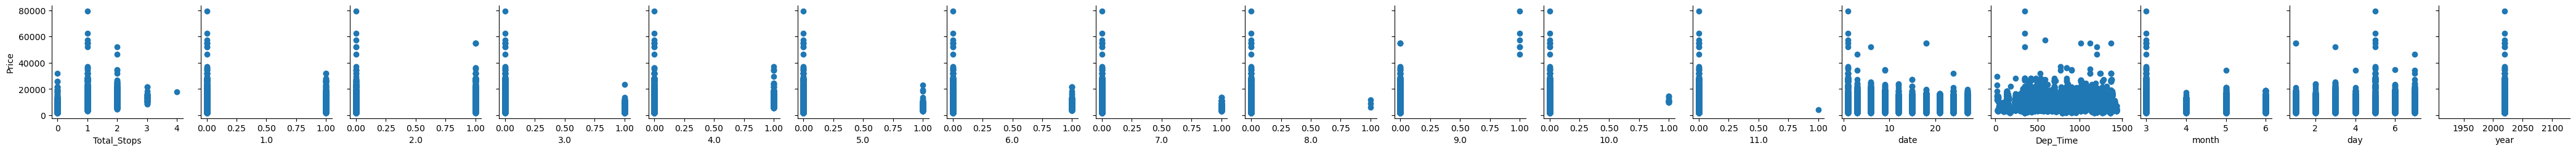

In [213]:
random_df2 = X_df.sample(n=X_df.shape[0], random_state=10)
random_df2 = pd.concat([random_df2, y_df], axis=1)
grid = sns.PairGrid(data=random_df2, y_vars=['Price'], x_vars=random_df2.columns.drop(labels='Price'))
grid.map(plt.scatter)
plt.show()

In [214]:
subset_results = []
ft_to_rem = 5
mm = MinMaxScaler()
sample_size = X_df.shape[0]
np.random.seed(42)
random_samples = np.random.choice(X_df.index, size=sample_size, replace=False)
X_df_sampled = X_df.loc[random_samples]
y_df_sampled = y_df.loc[random_samples]
X_main_df, X_test_df, y_main_df, y_test_df = train_test_split(X_df_sampled, y_df_sampled, test_size=0.2, random_state=11)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_main_df, y_main_df, test_size=0.1, random_state=42)
mm.fit(X_train_df)
X_train = mm.transform(X_train_df)
y_train = y_train_df.values
X_val = mm.transform(X_val_df)
y_val = y_val_df.values
X_test = mm.transform(X_test_df)
y_test = y_test_df.values
k = int(np.floor(np.sqrt(X_train.shape[0])))
knn = KNeighborsRegressor(n_neighbors=k)
for i in range(0, ft_to_rem+1):
    if i > 0:
        X_train_filtered = X_train[:, :-i]
        X_val_filtered = X_val[:, :-i]
    else:
        X_train_filtered = X_train
        X_val_filtered = X_val
    knn.fit(X_train_filtered, y_train)
    # Make predictions
    y_pred = knn.predict(X_val_filtered)

    # Evaluate the model
    mse = round(mean_squared_error(y_val, y_pred), 2)
    mape = round(np.mean(np.abs((y_val - y_pred) / y_val)) * 100, 2)
    subset_results.append({
        'features_dropped': i,
        'val_mse': mse,
        'val_mape': mape
    })
    print(f'Trial #{i}\n')
    print(f'Features Dropped: {i}')
    print(f"Validation Mean Squared Error: {mse}")
    print(f"Validation MAPE: {mape}%\n\n")

subset_results = sorted(subset_results, key=lambda x: (x['val_mse'], -x['features_dropped']))
print('Best Subset')
print(f"Features Dropped: {subset_results[0]['features_dropped']}")
print(f"Dropped Feature Names: {list(X_df.columns[-subset_results[0]['features_dropped']:])}")
print(f"Validation Mean Squared Error: {subset_results[0]['val_mse']}")
print(f"Validation MAPE: {subset_results[0]['val_mape']}%\n\n")

X_main_df, X_test_df, y_main_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=11)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_main_df, y_main_df, test_size=0.1, random_state=42)
mm.fit(X_train_df)
X_train = mm.transform(X_train_df)
y_train = y_train_df.values
X_val = mm.transform(X_val_df)
y_val = y_val_df.values
X_test = mm.transform(X_test_df)
y_test = y_test_df.values
X_test_filtered = X_test[:, :-subset_results[0]['features_dropped']]
X_train_filtered = X_train[:, :-subset_results[0]['features_dropped']]
X_val_filtered = X_val[:, :-subset_results[0]['features_dropped']]

Trial #0

Features Dropped: 0
Validation Mean Squared Error: 7335212.44
Validation MAPE: 26.06%


Trial #1

Features Dropped: 1
Validation Mean Squared Error: 7335212.44
Validation MAPE: 26.06%


Trial #2

Features Dropped: 2
Validation Mean Squared Error: 7065322.74
Validation MAPE: 25.08%


Trial #3

Features Dropped: 3
Validation Mean Squared Error: 8203880.49
Validation MAPE: 24.36%


Trial #4

Features Dropped: 4
Validation Mean Squared Error: 8166893.71
Validation MAPE: 23.32%


Trial #5

Features Dropped: 5
Validation Mean Squared Error: 8336290.18
Validation MAPE: 22.91%


Best Subset
Features Dropped: 2
Dropped Feature Names: ['day', 'year']
Validation Mean Squared Error: 7065322.74
Validation MAPE: 25.08%




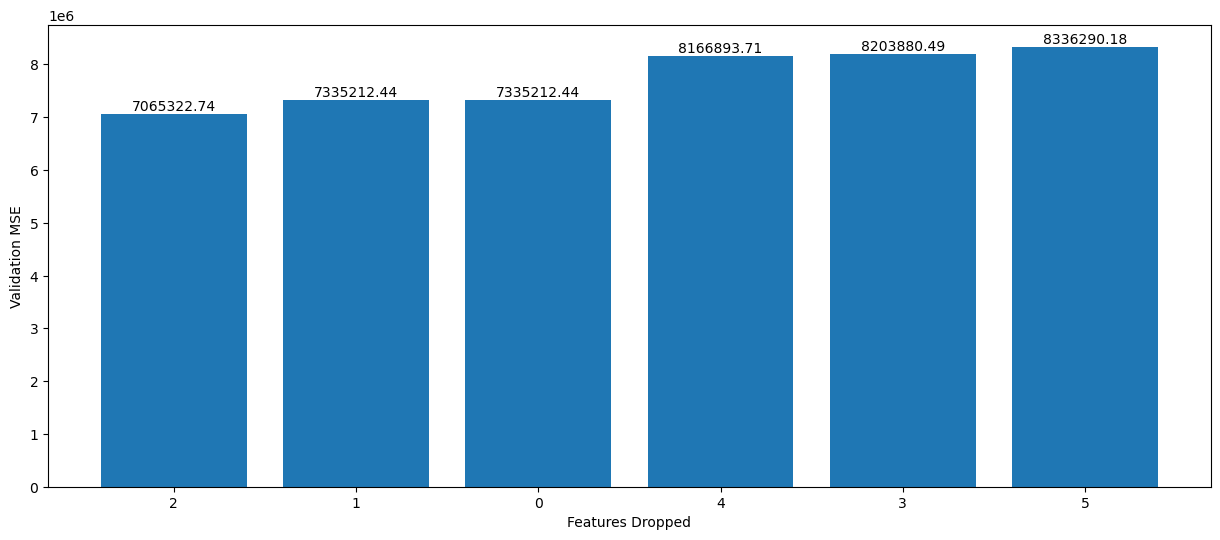

In [284]:
val_mse = map(lambda x: x['val_mse'], subset_results)
val_mape = list(val_mse)
ft_dropped = map(lambda x: x['features_dropped'], subset_results)
ft_dropped = list(ft_dropped)
idx = np.arange(0, len(subset_results))
plt.figure(figsize=(15, 6))
bars = plt.bar(idx, val_mape)
plt.xlabel('Features Dropped')
plt.ylabel('Validation MSE')
plt.xticks(idx, ft_dropped)
# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.show()

In [217]:
class Tuner(Callback):
    def __init__(self, monitor, early_stopping=False, patience=5):
        super(Tuner, self).__init__()
        self.best_val = float('inf')
        self.monitor = monitor
        self.best_epoch = None
        self.best_weights = None
        self.final_model_training_loss = float('inf')
        self.patience_counter = 0
        self.last_training_loss = float('inf')
        self.early_stopping = early_stopping
        self.patience = patience

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') > self.last_training_loss:
            self.patience_counter = 0
            lr = self.model.optimizer.learning_rate.numpy()
            lr *= 0.9
            self.model.optimizer.learning_rate.assign(lr)
        elif self.early_stopping:
            if (self.last_training_loss - logs.get('loss')) < 0.001:
                self.patience_counter += 1
                if self.patience_counter == self.patience:
                    self.model.stop_training = True
                    self.model.set_weights(self.best_weights)
                    print(f'\nRestoring Best Weights From Epoch: {self.best_epoch+1}\n')
                    print(f'Selected model {self.monitor}: {self.best_val}')
                    print(f'Selected model training loss: {self.final_model_training_loss}\n\n')
            else:
                self.patience_counter = 0
        current_val = logs.get(self.monitor)
        if current_val < self.best_val:
            self.best_val = current_val
            self.best_epoch = epoch
            self.best_weights = self.model.get_weights()
            self.final_model_training_loss = logs.get('loss')
            self.final_model_val_loss = logs.get('val_loss')
        self.last_training_loss = logs.get('loss')
        if epoch == self.params['epochs']-1:
            self.model.set_weights(self.best_weights)
            print(f'\nRestoring Best Weights From Epoch: {self.best_epoch+1}\n')
            print(f'Selected model {self.monitor}: {self.best_val}')
            print(f'Selected model training loss: {self.final_model_training_loss}\n\n')

In [218]:
def generate_combinations(arr, r):
    # Helper function to generate combinations
    def backtrack(start, path):
        # If the combination is of length r, add it to the result
        if len(path) == r:
            result.append(path[:])
            return
        for i in range(start, len(arr)):
            # Add the current element and recurse
            path.append(arr[i])
            backtrack(i, path)
            path.pop()  # Backtrack

    arr.sort(reverse=True)  # Ensure the array is sorted in descending order
    result = []
    backtrack(0, [])
    return result

In [219]:
def model_selector(X_train, y_train, X_val, y_val, total_outputs, task, learning_rates=[1., 0.1, 0.01, 0.001, 0.0001], epochs=50, batch_size=128, verbose=0, min_hidden_layers=None, max_hidden_layers=None, min_neurons=None, max_neurons=None, neuron_step=None, neuron_combinations_array=None):
    '''

    task: 'regression' or 'classification'
    neuron_combination_array: for manually entering the layers and neurons in each hidden layer. Enclose the neurons of different layers in separate lists, enclosed in an outer list.
    Example: A combination of 1 hidden layer neurons: 2,4,8 and 2 hidden layer neurons [16, 8], [8, 8], [8, 4] will be represented as:
    [ [ [2], [4], [8] ], [ [16, 8], [8, 8], [8, 4] ] ]
    '''
    trial_count = 0
    learning_rates = sorted(learning_rates, reverse=True) #Ensuring the learning rates in descending order
    models = []
    if task == 'regression':
        loss_func = 'mse'
    elif task == 'classification':
      if total_outputs == 1:
        loss_func = tf.keras.losses.BinaryCrossentropy(from_logits=True)
      else:
        loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    else:
      raise("Invalid value of parameter 'task'. Choose 'regression' or 'classification'.")
    neuron_combinations_sum = 0
    if not neuron_combinations_array:
      neuron_combinations_array = []
      neuron_choices = [i for i in range(min_neurons, max_neurons+1, neuron_step)]
      for layer in range(min_hidden_layers, max_hidden_layers+1):
        neuron_combinations = generate_combinations(neuron_choices, layer)
        neuron_combinations_array.append(neuron_combinations)
        neuron_combinations_sum += len(neuron_combinations)
    else:
      for layer in neuron_combinations_array:
        neuron_combinations_sum += len(layer)
    print(f'Total Trials: {neuron_combinations_sum * len(learning_rates) * 2}\n')
    for layer in range(1, len(neuron_combinations_array)+1):
        neuron_combinations = neuron_combinations_array[layer-1]
        # neuron_combinations = [ [24,16], [22,16], [20,16] ]
        neuron_combination_idx = 0
        while neuron_combination_idx < len(neuron_combinations):
            skip_batch_normed = False   # This is to skip the subsequent trials if loss increases with decrease in learning rate.
            skip_non_batch_normed = False
            last_batch_normed_val_loss = float('inf')
            last_non_batch_normed_val_loss = float('inf')
            for lr in learning_rates:
              for batch_norm in range(2):
                trial_count +=1
                print(f'Trial #{trial_count}\n')
                if (batch_norm == 0 and not skip_non_batch_normed) or (batch_norm == 1 and not skip_batch_normed):
                  model = tf.keras.Sequential()
                  model.add(tf.keras.Input(shape=(X_train.shape[1],)))
                  for neuron in neuron_combinations[neuron_combination_idx]:
                      model.add(tf.keras.layers.Dense(units=neuron, activation='relu'))
                      if batch_norm == 1:
                          model.add(tf.keras.layers.BatchNormalization())
                  print(f'Total layers: {len(neuron_combinations[neuron_combination_idx])}')
                  print(f'Neurons combination: {neuron_combinations[neuron_combination_idx]}')
                  print(f'Learning Rate: {lr}')
                  print(f"Batch Normalization: {'Yes' if batch_norm==1 else 'No'}\n")
                  model.add(tf.keras.layers.Dense(total_outputs, ))
                  monitor = Tuner(monitor='val_loss', early_stopping=True, patience=5)
                  model.compile(loss=loss_func, optimizer=tf.keras.optimizers.Adam(learning_rate=lr))
                  history = model.fit(X_train,y_train,validation_data=(X_val,y_val), callbacks=[monitor], verbose=verbose, epochs=epochs, batch_size=batch_size)
                  val_loss = model.evaluate(X_val, y_val, verbose=0)
                  training_loss = model.evaluate(X_train, y_train, verbose=0)
                  models.append({
                      'model': model,
                      'hidden_layers': layer,
                      'hidden_layer_neurons': neuron_combinations[neuron_combination_idx],
                      'learning_rate': lr,
                      'batch_norm': 'yes' if batch_norm == 1 else 'no',
                      'training_loss': training_loss,
                      'val_loss': val_loss
                  })
                  if batch_norm == 1:
                    if last_batch_normed_val_loss < val_loss:
                      skip_batch_normed = True
                    last_batch_normed_val_loss = val_loss
                  else:
                    if last_non_batch_normed_val_loss < val_loss:
                      skip_non_batch_normed = True
                    last_non_batch_normed_val_loss = val_loss
                else:
                  print('Skipping Trial because of too slow learning rate! \n\n')
            neuron_combination_idx += 1
    models = sorted(models, key=lambda x: x['val_loss'])
    return models


### Start off with shallow NN with small number of neurons

In [220]:
models1 = model_selector(
    X_train_filtered,
    y_train,
    X_val_filtered,
    y_val,
    task='regression',
    total_outputs=1,
    min_hidden_layers=1,
    max_hidden_layers=1,
    min_neurons=8,
    max_neurons=32,
    neuron_step=8,
    epochs=50
)

Total Trials: 40

Trial #1

Total layers: 1
Neurons combination: [32]
Learning Rate: 1.0
Batch Normalization: No


Restoring Best Weights From Epoch: 49

Selected model val_loss: 5788952.5
Selected model training loss: 6286115.0


Trial #2

Total layers: 1
Neurons combination: [32]
Learning Rate: 1.0
Batch Normalization: Yes


Restoring Best Weights From Epoch: 12

Selected model val_loss: 5726457.0
Selected model training loss: 6567297.0


Trial #3

Total layers: 1
Neurons combination: [32]
Learning Rate: 0.1
Batch Normalization: No


Restoring Best Weights From Epoch: 50

Selected model val_loss: 7355397.5
Selected model training loss: 7621632.5


Trial #4

Total layers: 1
Neurons combination: [32]
Learning Rate: 0.1
Batch Normalization: Yes


Restoring Best Weights From Epoch: 9

Selected model val_loss: 5540970.5
Selected model training loss: 6027571.0


Trial #5

Skipping Trial because of too slow learning rate! 


Trial #6

Total layers: 1
Neurons combination: [32]
Learning Rate:

In [221]:
models1

[{'model': <Sequential name=sequential_292, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24],
  'learning_rate': 1.0,
  'batch_norm': 'yes',
  'training_loss': 5762751.0,
  'val_loss': 4954660.5},
 {'model': <Sequential name=sequential_303, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [8],
  'learning_rate': 0.1,
  'batch_norm': 'yes',
  'training_loss': 5932733.0,
  'val_loss': 5130124.5},
 {'model': <Sequential name=sequential_298, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [16],
  'learning_rate': 0.1,
  'batch_norm': 'yes',
  'training_loss': 5614088.0,
  'val_loss': 5320242.5},
 {'model': <Sequential name=sequential_296, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [16],
  'learning_rate': 1.0,
  'batch_norm': 'yes',
  'training_loss': 5893469.0,
  'val_loss': 5353951.0},
 {'model': <Sequential name=sequential_289, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [32],
  'learning_rate': 0.01,
  'batch_

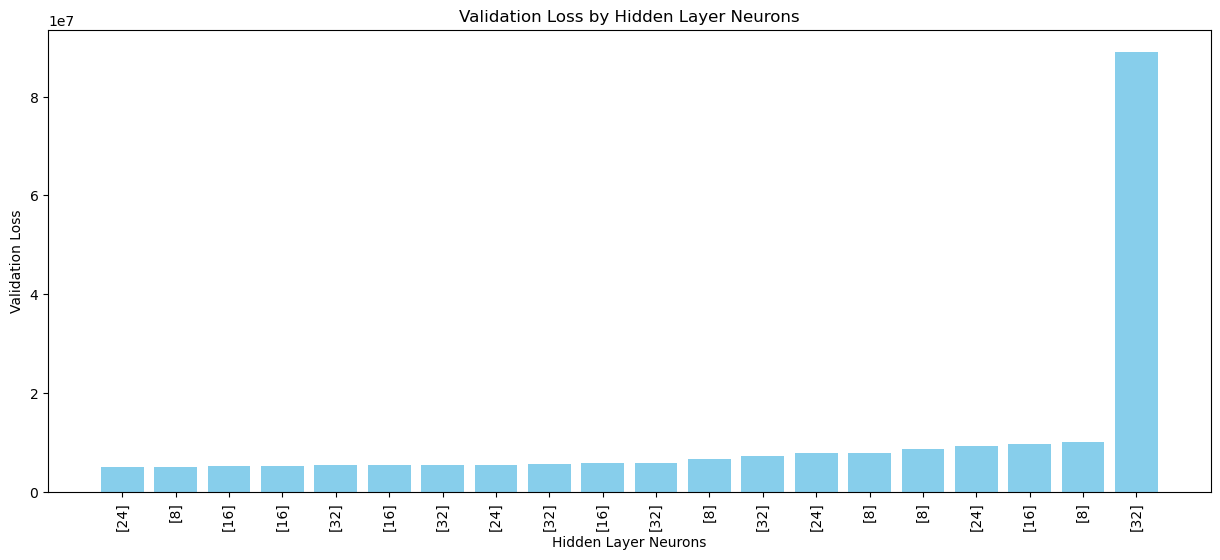

In [283]:
val_loss = map(lambda x: x['val_loss'], models1)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models1)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x, val_loss, color='skyblue')

# Add value labels on top of each bar
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x, val_loss_neurons, rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Analyzing Top 10 Models

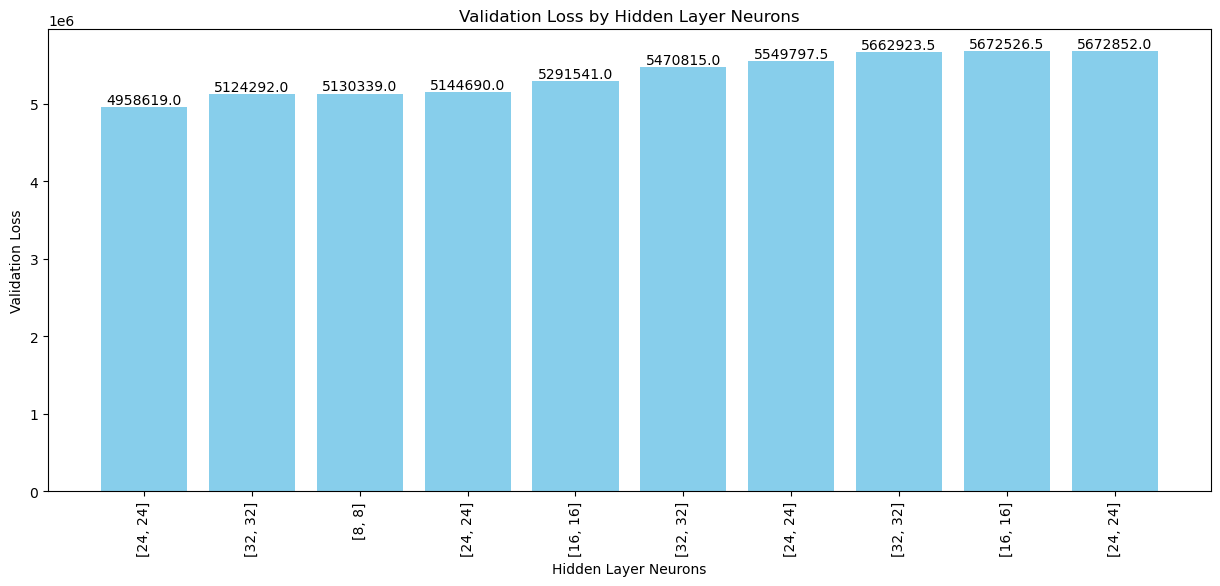

In [282]:
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Let's make a moderately complex NN

In [224]:
models2 = model_selector(
    X_train_filtered,
    y_train,
    X_val_filtered,
    y_val,
    total_outputs=1,
    task='regression',
    epochs=50,
    neuron_combinations_array=[ [ [32,32], [24,24], [16,16], [8,8] ] ]
)

Total Trials: 40

Trial #1

Total layers: 2
Neurons combination: [32, 32]
Learning Rate: 1.0
Batch Normalization: No


Restoring Best Weights From Epoch: 49

Selected model val_loss: 5124292.0
Selected model training loss: 5612013.0


Trial #2

Total layers: 2
Neurons combination: [32, 32]
Learning Rate: 1.0
Batch Normalization: Yes


Restoring Best Weights From Epoch: 27

Selected model val_loss: 5470815.0
Selected model training loss: 6072248.5


Trial #3

Total layers: 2
Neurons combination: [32, 32]
Learning Rate: 0.1
Batch Normalization: No


Restoring Best Weights From Epoch: 49

Selected model val_loss: 5662923.0
Selected model training loss: 6148568.0


Trial #4

Total layers: 2
Neurons combination: [32, 32]
Learning Rate: 0.1
Batch Normalization: Yes


Restoring Best Weights From Epoch: 6

Selected model val_loss: 11035303.0
Selected model training loss: 6636132.5


Trial #5

Skipping Trial because of too slow learning rate! 


Trial #6

Skipping Trial because of too slow lear

In [225]:
models2

[{'model': <Sequential name=sequential_310, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24, 24],
  'learning_rate': 1.0,
  'batch_norm': 'yes',
  'training_loss': 5293362.5,
  'val_loss': 4958619.0},
 {'model': <Sequential name=sequential_305, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [32, 32],
  'learning_rate': 1.0,
  'batch_norm': 'no',
  'training_loss': 5483078.5,
  'val_loss': 5124292.0},
 {'model': <Sequential name=sequential_320, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [8, 8],
  'learning_rate': 1.0,
  'batch_norm': 'yes',
  'training_loss': 5650209.5,
  'val_loss': 5130339.0},
 {'model': <Sequential name=sequential_312, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24, 24],
  'learning_rate': 0.1,
  'batch_norm': 'yes',
  'training_loss': 5997986.5,
  'val_loss': 5144690.0},
 {'model': <Sequential name=sequential_317, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [16, 16],
  'learning_rate

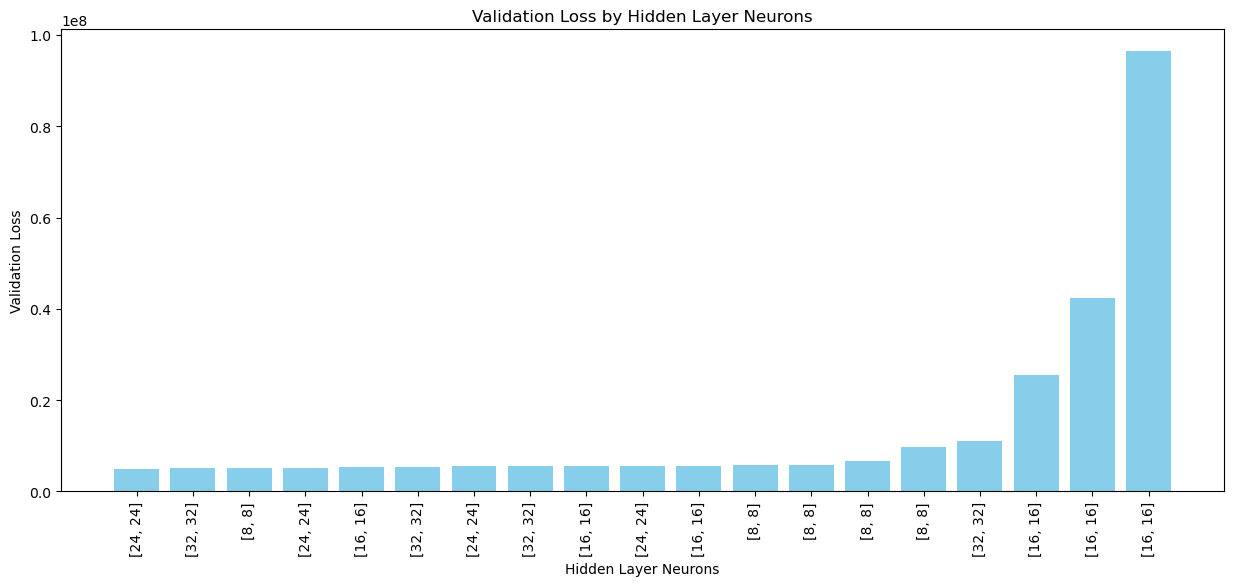

In [281]:
val_loss = map(lambda x: x['val_loss'], models2)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models2)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x, val_loss, color='skyblue')

# Add value labels on top of each bar
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x, val_loss_neurons, rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
# plt.savefig('test_mape_by_neurons.png')
plt.show()

### Analyzing Top 10 Models

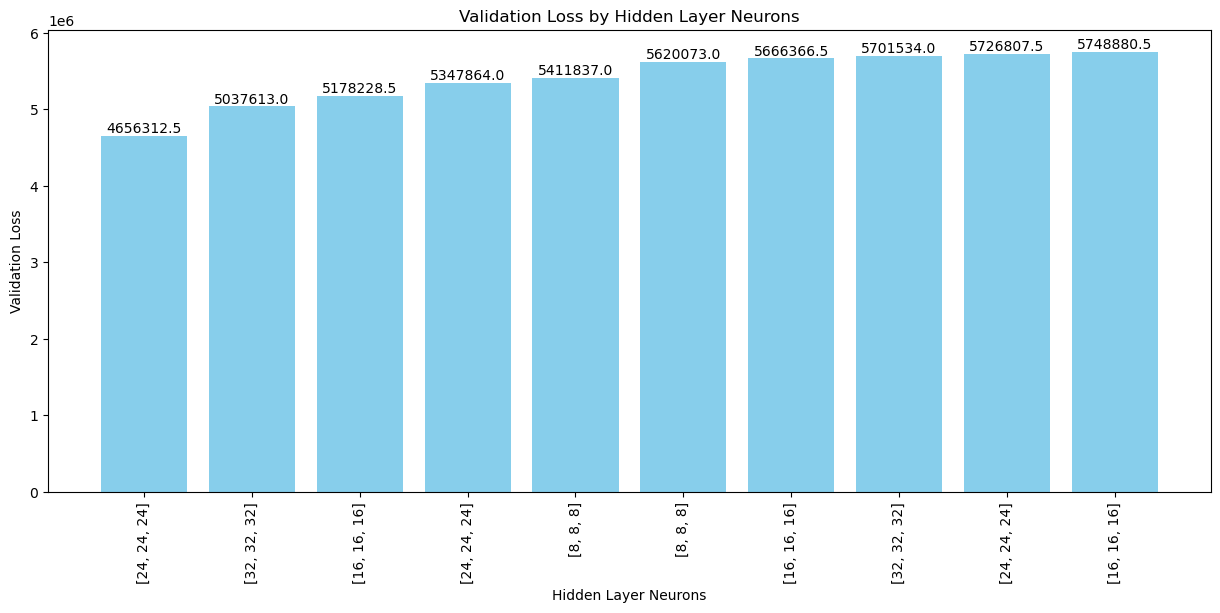

In [280]:
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Let's make a Deep NN

In [233]:
models3 = model_selector(
    X_train_filtered,
    y_train,
    X_val_filtered,
    y_val,
    total_outputs=1,
    task='regression',
    epochs=50,
    neuron_combinations_array=[ [ [32,32,32], [24,24,24], [16,16,16], [8,8,8] ] ]
)

Total Trials: 40

Trial #1

Total layers: 3
Neurons combination: [32, 32, 32]
Learning Rate: 1.0
Batch Normalization: No


Restoring Best Weights From Epoch: 50

Selected model val_loss: 64041608.0
Selected model training loss: 63497492.0


Trial #2

Total layers: 3
Neurons combination: [32, 32, 32]
Learning Rate: 1.0
Batch Normalization: Yes


Restoring Best Weights From Epoch: 9

Selected model val_loss: 9645039.0
Selected model training loss: 7023181.0


Trial #3

Total layers: 3
Neurons combination: [32, 32, 32]
Learning Rate: 0.1
Batch Normalization: No


Restoring Best Weights From Epoch: 50

Selected model val_loss: 5037613.5
Selected model training loss: 5739446.0


Trial #4

Total layers: 3
Neurons combination: [32, 32, 32]
Learning Rate: 0.1
Batch Normalization: Yes


Restoring Best Weights From Epoch: 27

Selected model val_loss: 5891781.0
Selected model training loss: 5828919.0


Trial #5

Total layers: 3
Neurons combination: [32, 32, 32]
Learning Rate: 0.01
Batch Normaliza

In [234]:
models3

[{'model': <Sequential name=sequential_377, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24, 24, 24],
  'learning_rate': 0.01,
  'batch_norm': 'yes',
  'training_loss': 5031794.0,
  'val_loss': 4656312.5},
 {'model': <Sequential name=sequential_368, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [32, 32, 32],
  'learning_rate': 0.1,
  'batch_norm': 'no',
  'training_loss': 5649107.5,
  'val_loss': 5037613.0},
 {'model': <Sequential name=sequential_380, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [16, 16, 16],
  'learning_rate': 1.0,
  'batch_norm': 'yes',
  'training_loss': 5889494.0,
  'val_loss': 5178228.5},
 {'model': <Sequential name=sequential_374, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [24, 24, 24],
  'learning_rate': 0.1,
  'batch_norm': 'no',
  'training_loss': 5935527.5,
  'val_loss': 5347864.0},
 {'model': <Sequential name=sequential_385, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [8, 8, 8

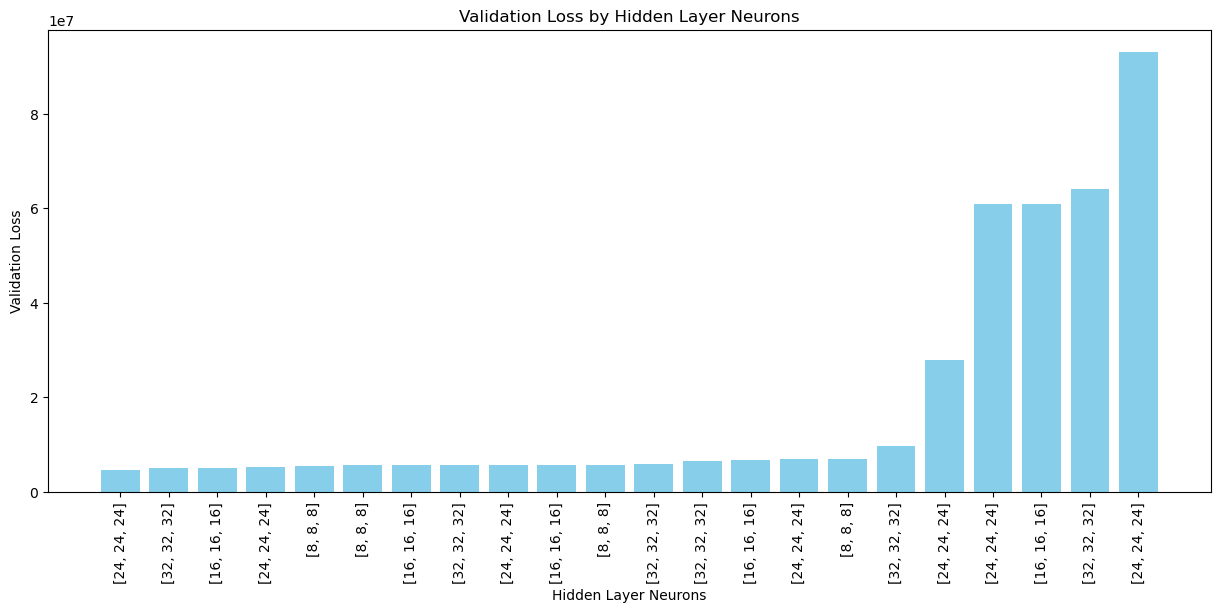

In [279]:
val_loss = map(lambda x: x['val_loss'], models3)
val_loss = list(val_loss)
val_loss_neurons = map(lambda x: x['hidden_layer_neurons'], models3)
val_loss_neurons = list(val_loss_neurons)
val_loss_neurons = map(lambda x: str(x), val_loss_neurons)
val_loss_neurons = list(val_loss_neurons)
x = [i for i in range(len(val_loss))]
plt.figure(figsize=(15, 6))
bars = plt.bar(x, val_loss, color='skyblue')

# Add value labels on top of each bar
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x, val_loss_neurons, rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
# plt.savefig('test_mape_by_neurons.png')
plt.show()

### Analyzing Top 10 Models

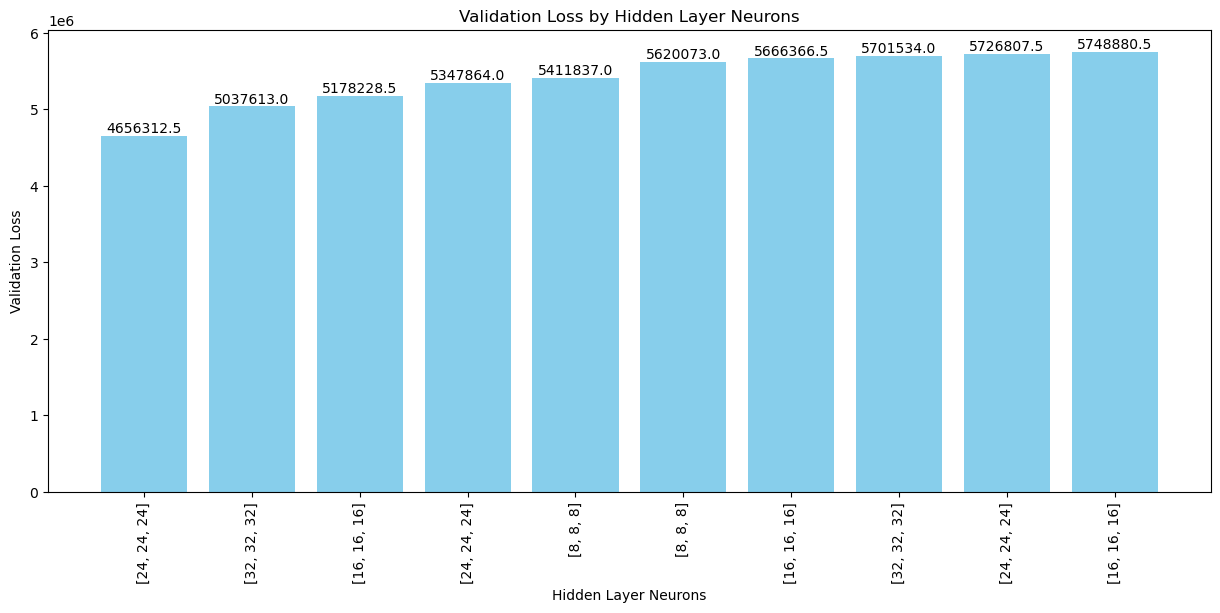

In [278]:
plt.figure(figsize=(15, 6))
bars = plt.bar(x[:10], val_loss[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

In [237]:
def get_nn_multiplications(layer_neurons):
    '''

    layer_neurons contain all the layers of NN including input layer and output layer.
    Example: A NN with input layer of 20 features, 2 hidden layers with neurons 16 and 8 respectively and output layer with 2 neurons will have
    layer_neurons = [20, 16, 8, 2]

    '''
    sums = []
    idx = 1
    for i in range(len(layer_neurons)-1):
        sums.append(layer_neurons[i]*layer_neurons[idx])
        idx += 1
    return sum(sums)

In [290]:
models_combined = models1 + models2 + models3
models_combined = sorted(models_combined, key=lambda x: x['val_loss'])
val_loss_combined = map(lambda x: x['val_loss'], models_combined)
val_loss_combined = list(val_loss_combined)
val_loss_combined_rel = np.array(val_loss_combined) / val_loss_combined[0] * 100
val_loss_combined_neurons = list(map(lambda x: x['hidden_layer_neurons'], models_combined))
nn_multiplications = []
total_outputs = 1

for i in range(len(val_loss_combined_neurons)):
  nn_multiplications.append(get_nn_multiplications([X_train_filtered.shape[1]] + val_loss_combined_neurons[i] + [total_outputs]))

nn_multiplications_rel = np.array(nn_multiplications) / nn_multiplications[0] * 100

### Analyzing Top 10 Combined Models

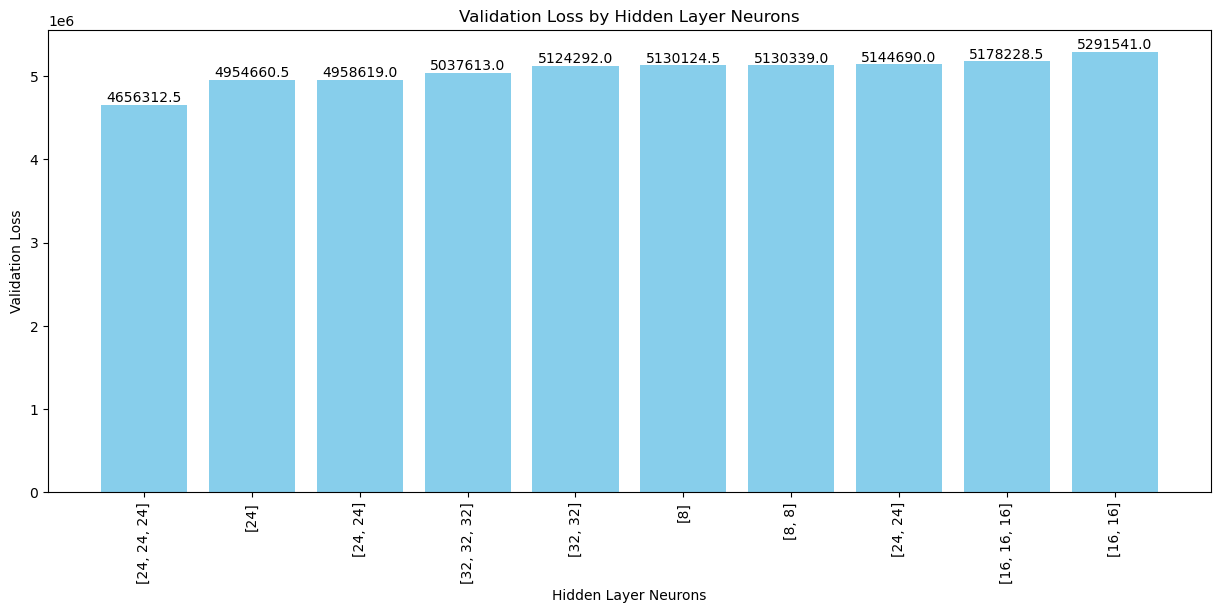

In [292]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(val_loss_combined))]
bars = plt.bar(x[:10], val_loss_combined[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('Validation Loss by Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('Validation Loss')
plt.show()

### Displaying number of multiplications of top 10 models

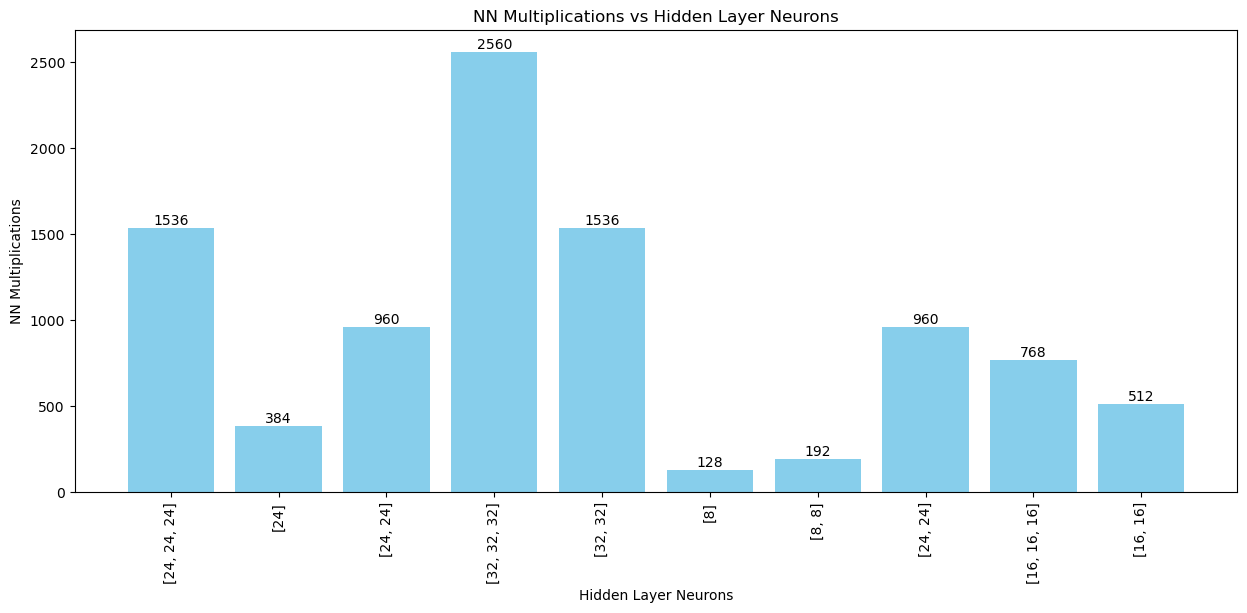

In [294]:
plt.figure(figsize=(15, 6))
x = [i for i in range(len(nn_multiplications))]
bars = plt.bar(x[:10], nn_multiplications[:10], color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(x[:10], val_loss_combined_neurons[:10], rotation=90)
plt.title('NN Multiplications vs Hidden Layer Neurons')
plt.xlabel('Hidden Layer Neurons')
plt.ylabel('NN Multiplications')
plt.show()

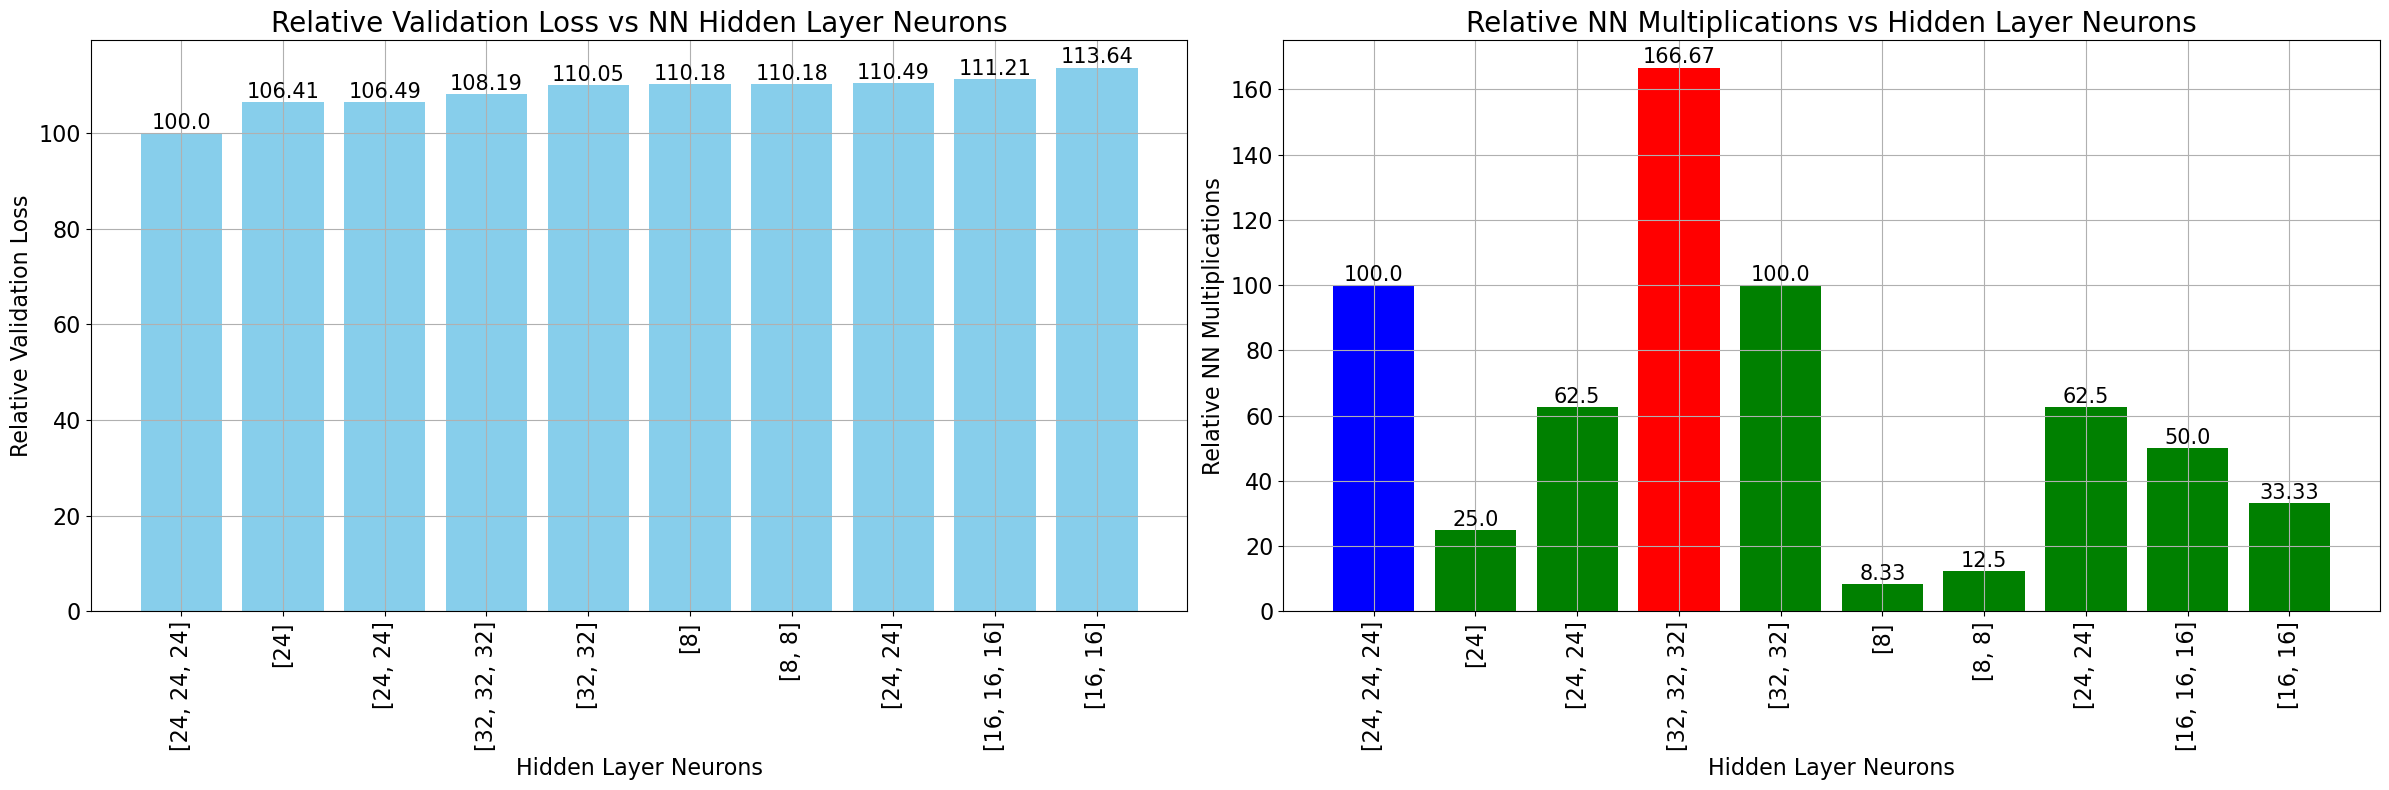

In [289]:
top_models_to_disp = 10

# Font size
font_size = 16

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
x = [i for i in range(len(val_loss_combined_rel))]

# Plotting bar plot for validation loss
bars1 = ax[0].bar(x[:top_models_to_disp], val_loss_combined_rel[:top_models_to_disp], color='skyblue')
ax[0].set_title('Relative Validation Loss vs NN Hidden Layer Neurons', fontsize=20)
ax[0].set_xlabel('Hidden Layer Neurons', fontsize=font_size)
ax[0].set_ylabel('Relative Validation Loss', fontsize=font_size)
ax[0].set_xticks(x[:top_models_to_disp], val_loss_combined_neurons[:top_models_to_disp], rotation=90)
ax[0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0].grid(True)

# Plotting bar plot for NN multiplications
bars2 = []
for i, (v1, v2) in enumerate(zip(x[:top_models_to_disp], nn_multiplications_rel[:top_models_to_disp])):
    if i == 0:
        color = 'blue'
    else:
        color = 'red' if v2 > 100 else 'green'
    bars2.append(ax[1].bar(v1, v2, color=color))
ax[1].set_title('Relative NN Multiplications vs Hidden Layer Neurons', fontsize=20)
ax[1].set_xlabel('Hidden Layer Neurons', fontsize=font_size)
ax[1].set_ylabel('Relative NN Multiplications', fontsize=font_size)
ax[1].set_xticks(x[:top_models_to_disp], val_loss_combined_neurons[:top_models_to_disp], rotation=90)
ax[1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1].grid(True)

# Annotating bars in the first subplot
for bar in bars1:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize= 150 / top_models_to_disp)

# Annotating bars in the second subplot
for bars in bars2:
    for bar in bars:
        yval = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize= 150 / top_models_to_disp)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
